In [161]:
# importing libraries
# !pip install openpyxl
# !python -m pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
# Specify the file path
file_path = 'KPMG_rawData.xlsx'

In [163]:
def DFier(sn, sr, f):

    # Specify the sheet name
    sheet_name = sn

    # Read the Excel file
    df = pd.read_excel(f, sheet_name=sheet_name, skiprows=sr)
    
    return df

In [164]:
def plotify(data, T, x, y='Frequency', b=10, r='horizontal'):

    # Create a histogram
    plt.hist(data, bins=b, edgecolor='black')

    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(T)

    # Rotate and align the x-axis labels
    plt.xticks(rotation=r, ha='center')

    # Display the histogram
    plt.show()

## Transactions

In [165]:
trx = DFier('Transactions', 1, file_path)

In [166]:
# Display the transactions data
trx.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [167]:
# data size
trx.shape

(20000, 13)

In [168]:
# null values check
trx.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [169]:
trx.customer_id.unique().shape

(3494,)

In [170]:
# Check for duplicates
duplicates = trx.duplicated()

# Print the duplicate rows
trx[duplicates]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [171]:
trx['transaction_date'] = pd.to_datetime(trx['transaction_date'])

trx['previous_trx_period'] = 2023 - trx['transaction_date'].dt.year

trx.previous_trx_period.unique()

array([6], dtype=int32)

In [172]:
trx['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [173]:
# trx.brand.value_counts()

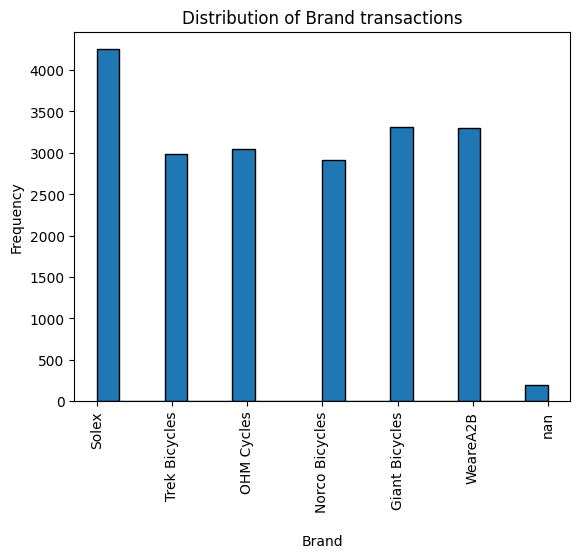

In [174]:
plotify(list(trx['brand']), T='Distribution of Brand transactions', x='\nBrand', 
        b=20, r='vertical')

In [175]:
trx['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [176]:
trx['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [177]:
trx['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

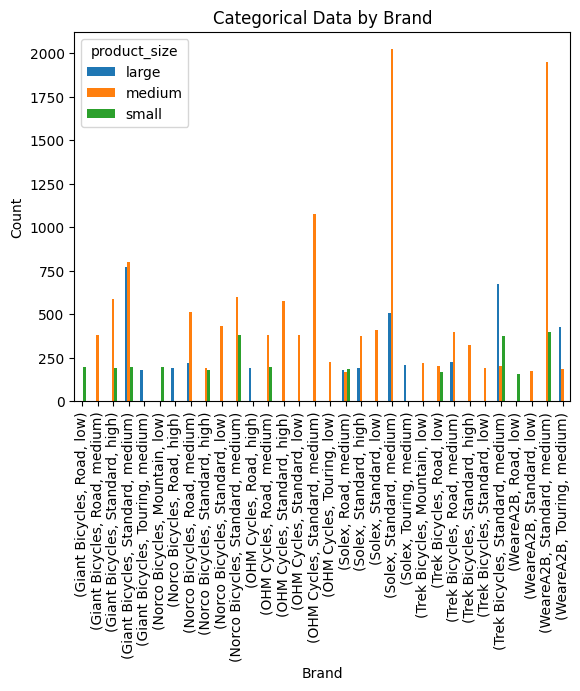

In [178]:
# Group the data by brand and calculate the counts for each category
grouped_data = trx.groupby('brand')[['product_line', 'product_class', 'product_size']].value_counts().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=False)

# Set labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Categorical Data by Brand')

# Display the plot
plt.show()

In [179]:
trx.order_status.value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [180]:
# Filter the DataFrame to get the desired rows
filtered_rows = trx[trx['standard_cost'] >=  trx['list_price']]

# Print the filtered rows
print(filtered_rows)

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date, previous_trx_period]
Index: []


### Observations


- Null values in columns
    - online_order               360
    - brand                      197
    - product_line               197
    - product_class              197
    - product_size               197
    - standard_cost              197
    - product_first_sold_date    197


- No duplicates found.


- product_first_sold_date column does not have data in appropriate date format but consists of decimal values.


- transaction_date is all set in 2017.


- Unique number of customer ids in the transactions were 3494.


- Numbers of online and in-store orders are identical.


- The brand Solex had higher transaction records.


- Standard parts were sold widely, followed by road category parts followed by touring and least records of mountain cycle equipment.


- 99.105% of the orders were approved.


- list_price is always higher than the standard_cost.

## Customer Demographic

In [181]:
cusdemo = DFier('CustomerDemographic', 1, file_path)

In [182]:
# Display the new customers data
cusdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [183]:
cusdemo.shape

(4000, 13)

In [184]:
cusdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [185]:
# Check for duplicates
duplicates = cusdemo.duplicated()

# Print the duplicate rows
cusdemo[duplicates]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [186]:
# Combine 'first_name' and 'last_name' columns to create 'full_name' column
cusdemo['full_name'] = cusdemo['first_name'] + ' ' + cusdemo['last_name']

# Count the number of unique customers based on 'full_name'
unique_customers = cusdemo['full_name'].nunique()

# Print the result
print("Number of unique customers:", unique_customers)

Number of unique customers: 3875


In [187]:
# cusdemo.customer_id.nunique()

In [188]:
# Convert the 'DOB' column to datetime
cusdemo['DOB'] = pd.to_datetime(cusdemo['DOB'])

# Calculate the age by subtracting the year from the current year
cusdemo['Age'] = 2023 - cusdemo['DOB'].dt.year

# Filter rows where the age is above 100
Age100 = cusdemo[cusdemo['Age'] >= 100]

# the rows with age above 100
Age100

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,full_name,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,Jephthah Bachmann,180.0


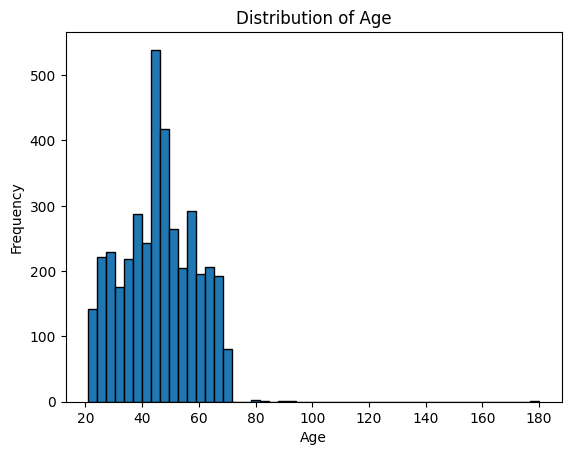

In [189]:
plotify(cusdemo['Age'], T='Distribution of Age', x='Age', b=50)

In [190]:
cusdemo.gender.value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

In [191]:
# Define the mapping of values to be replaced
mapping = {'F': 'Female', 'Femal': 'Female', 'M': 'Male'}

# Replace values in 'gender' column
cusdemo['gender'] = cusdemo['gender'].replace(mapping)

cusdemo.gender.value_counts()

gender
Female    2039
Male      1873
U           88
Name: count, dtype: int64

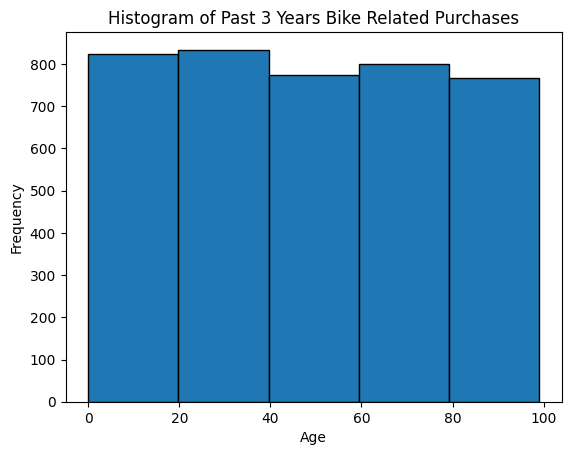

In [192]:
p3 = cusdemo['past_3_years_bike_related_purchases']
plotify(p3, T='Histogram of Past 3 Years Bike Related Purchases', x='Age', b=5)

In [193]:
cusdemo.deceased_indicator.value_counts()

deceased_indicator
N    3998
Y       2
Name: count, dtype: int64

In [194]:
# Saving deceased customer info
deceased_customers = list(cusdemo[cusdemo['deceased_indicator'] == 'Y']['customer_id'])
deceased_customers

[753, 3790]

In [195]:
cusdemo.job_title.value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [196]:
cusdemo.job_industry_category.value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [197]:
cusdemo.wealth_segment.value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [198]:
# Group the data by 'wealth_segment' and 'job_industry_category', and count the occurrences
grouped_data = cusdemo.groupby(['wealth_segment', 'job_industry_category']).size().reset_index(name='count')

# Sort the data by 'wealth_segment' and 'count' in descending order
grouped_data = grouped_data.sort_values(['wealth_segment', 'count'], ascending=[True, False])

# Iterate over the wealth segments and print the results
wealth_segments = grouped_data['wealth_segment'].unique()

for segment in wealth_segments:
    print(segment + ':')
    segment_data = grouped_data[grouped_data['wealth_segment'] == segment]
    for index, row in segment_data.iterrows():
        print(row['job_industry_category'] + ': ' + str(row['count']))
    print()

Affluent Customer:
Manufacturing: 224
Financial Services: 188
Health: 134
Retail: 88
Property: 54
IT: 53
Entertainment: 32
Argiculture: 22
Telecommunications: 16

High Net Worth:
Financial Services: 204
Manufacturing: 171
Health: 155
Retail: 92
Property: 77
IT: 61
Argiculture: 37
Entertainment: 33
Telecommunications: 21

Mass Customer:
Manufacturing: 404
Financial Services: 382
Health: 313
Retail: 178
Property: 136
IT: 109
Entertainment: 71
Argiculture: 54
Telecommunications: 35



In [199]:
cusdemo.owns_car.value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

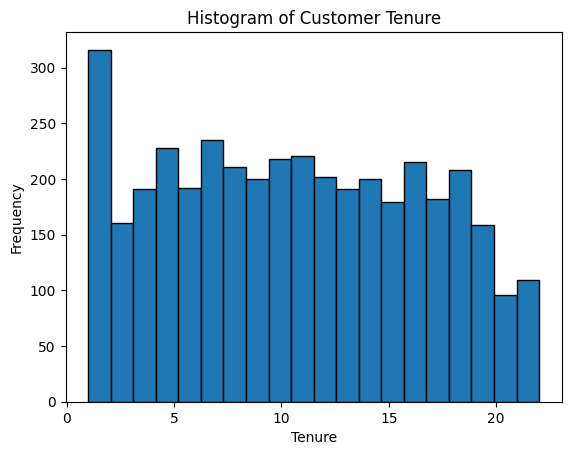

In [200]:
plotify(cusdemo['tenure'], T='Histogram of Customer Tenure', x='Tenure', b=20)

### Observations


- Null values in columns
    - last_name                              125
    - DOB                                     87
    - job_title                              506
    - job_industry_category                  656
    - default                                302
    - tenure                                  87
    
    
- The default column doesn't provide meaningful information with respect to the customer demographic data. There is also no consistancy in the type of data stored.


- As mentioned, Jephthah Bachmann is a 180 year old person. that is highly unlikely.


- Majority of customers are within 40 to 60 year range.


- gender column doesn't follow single convention. I found values like Female, Male, U, F, Femal, M.


- The company has higher number of female customers than male customers.


- There are 2 customers that are deceased.


- Half the demographic falls under mass customers with affluent and high profile individuals being similar in number.


- The customers belong to Manufacturing, Financial Services, Health predominantly.


- Majority of the customers are from Manufacturing, Financial Services, Health industries with lowest majorities belonging to Entertainment, Argiculture, Telecommunications.

## Customer Address

In [201]:
cusadd = DFier('CustomerAddress', 1, file_path)

In [202]:
# Display the new customers data
cusadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [203]:
cusadd.shape

(3999, 6)

In [204]:
cusadd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [205]:
# Check for duplicates
duplicates = cusadd.duplicated()

# Print the duplicate rows
cusadd[duplicates]

,customer_id,address,postcode,state,country,property_valuation


In [206]:
# 180 years old customer info
customer_180 = cusadd[cusadd['customer_id'] == 34]
customer_180

,customer_id,address,postcode,state,country,property_valuation
29,34,833 Luster Way,4005,QLD,Australia,8


In [207]:
# deceased customer info
cusadd[cusadd['customer_id'].isin(deceased_customers)]

,customer_id,address,postcode,state,country,property_valuation
748,753,37 Dorton Street,2594,NSW,Australia,3
3785,3790,8681 Dennis Pass,3215,VIC,Australia,3


In [208]:
# customer_id = 3 customer info
cus = cusadd[cusadd['customer_id'] == 3]
cus

,customer_id,address,postcode,state,country,property_valuation


In [209]:
cusadd.country.value_counts()

country
Australia    3999
Name: count, dtype: int64

In [210]:
cusadd.state.value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [211]:
# Define the mapping of values to be replaced
mapping = {'NSW': 'New South Wales', 'VIC': 'Victoria', 'QLD': 'Queensland'}

# Replace values in 'state' column
cusadd['state'] = cusadd['state'].replace(mapping)

cusadd.state.value_counts()

state
New South Wales    2140
Victoria           1021
Queensland          838
Name: count, dtype: int64

In [212]:
cusadd.postcode.nunique()

873

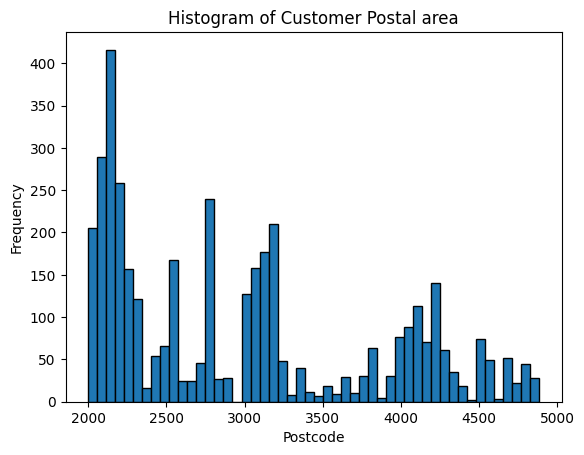

In [213]:
plotify(cusadd['postcode'], T='Histogram of Customer Postal area', x='Postcode', b=50)

In [214]:
cusadd.property_valuation.value_counts()

property_valuation
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: count, dtype: int64

In [215]:
# Discripancy in customer_id data
print(cusadd.customer_id.nunique())
print(cusdemo.customer_id.nunique())
print(trx.customer_id.nunique())

# We are missing 506 customer transactions data
# Also customer_id = 3 address details are missing

3999
4000
3494


### Obersevations


- No null values.


- No duplicates.


- 180 year old customer's data exists.


- customer_id = 3 is missing in this sheet.


- The states have not being filled under a common protocol. There are NSW and New South Wales. Also Victoria and VIC exist.


- More than half the customers are from the state New South Wales.


- There are 873 unique postcodes in customer address.

## New Customers

In [216]:
ncus = DFier('NewCustomerList', 1, file_path)

In [217]:
# Display the new customers data
ncus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.74,0.9250,1.15625,0.982812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.46,0.4600,0.57500,0.488750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.72,0.7200,0.72000,0.720000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.75,0.9375,0.93750,0.937500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.90,0.9000,1.12500,1.125000,4,4,1.703125


In [218]:
ncus.shape

(1000, 23)

In [219]:
ncus.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [220]:
# Check for duplicates
duplicates = ncus.duplicated()

# Print the duplicate rows
ncus[duplicates]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [221]:
ncus.Rank

0         1
1         1
2         1
3         4
4         4
       ... 
995     996
996     997
997     997
998     997
999    1000
Name: Rank, Length: 1000, dtype: int64

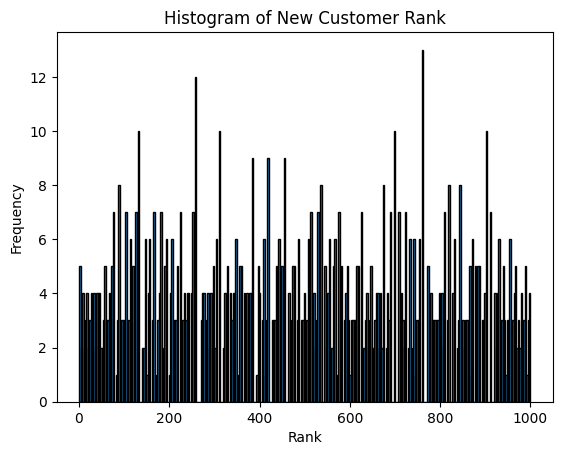

In [222]:
plotify(ncus['Rank'], T='Histogram of New Customer Rank', x='Rank', b=324)

In [223]:
ncus['full_name'] = ncus['first_name'] + ' ' + ncus['last_name']

cusdemo['full_name'] = cusdemo['first_name'] + ' ' + cusdemo['last_name']

In [224]:
# Create a set of unique full names from ncus dataframe excluding NaN values
ncus_full_names = set(ncus['full_name'].dropna())

# Create a set of unique full names from cusdemo dataframe excluding NaN values
cusdemo_full_names = set(cusdemo['full_name'].dropna())

# Find the common full names
common_full_names = ncus_full_names.intersection(cusdemo_full_names)

# Check if there are common full names
if len(common_full_names) > 0:
    print("There are common full names between ncus and cusdemo dataframes.")
    print("Common Full Names:")
    for name in common_full_names:
        print(name)
else:
    print("There are no common full names between ncus and cusdemo dataframes.")

There are no common full names between ncus and cusdemo dataframes.


In [225]:
# Convert the 'DOB' column to datetime
ncus['DOB'] = pd.to_datetime(ncus['DOB'])

# Calculate the age by subtracting the year from the current year
ncus['Age'] = 2023 - ncus['DOB'].dt.year

# Filter rows where the age is above 100
Age100_ = ncus[ncus['Age'] >= 100]

# the rows with age above 100
Age100_

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,full_name,Age


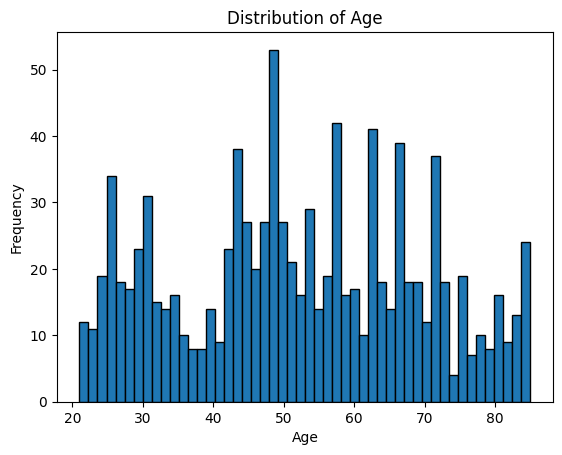

In [226]:
plotify(ncus['Age'], T='Distribution of Age', x='Age', b=50)

In [227]:
ncus.gender.value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

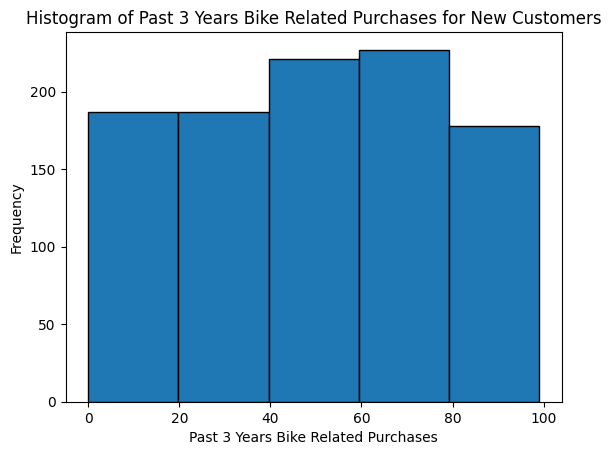

In [228]:
p3_ = ncus['past_3_years_bike_related_purchases']
plotify(p3_, T='Histogram of Past 3 Years Bike Related Purchases for New Customers',
        x='Past 3 Years Bike Related Purchases', b=5)

In [229]:
ncus.deceased_indicator.value_counts()

deceased_indicator
N    1000
Name: count, dtype: int64

In [230]:
ncus.job_title.value_counts()

job_title
Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: count, Length: 184, dtype: int64

In [231]:
ncus.job_industry_category.value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [232]:
ncus.wealth_segment.value_counts()

wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64

In [233]:
# Group the data by 'wealth_segment' and 'job_industry_category', and count the occurrences
grouped_data = ncus.groupby(['wealth_segment', 'job_industry_category']).size().reset_index(name='count')

# Sort the data by 'wealth_segment' and 'count' in descending order
grouped_data = grouped_data.sort_values(['wealth_segment', 'count'], ascending=[True, False])

# Iterate over the wealth segments and print the results
wealth_segments = grouped_data['wealth_segment'].unique()

for segment in wealth_segments:
    print(segment + ':')
    segment_data = grouped_data[grouped_data['wealth_segment'] == segment]
    for index, row in segment_data.iterrows():
        print(row['job_industry_category'] + ': ' + str(row['count']))
    print()

Affluent Customer:
Financial Services: 52
Manufacturing: 51
Health: 38
Retail: 20
Property: 14
IT: 13
Entertainment: 7
Argiculture: 5
Telecommunications: 4

High Net Worth:
Manufacturing: 61
Financial Services: 44
Health: 41
Entertainment: 15
Property: 13
Retail: 13
Telecommunications: 11
IT: 8
Argiculture: 2

Mass Customer:
Financial Services: 107
Manufacturing: 87
Health: 73
Retail: 45
Property: 37
IT: 30
Argiculture: 19
Entertainment: 15
Telecommunications: 10



In [234]:
ncus.owns_car.value_counts()

owns_car
No     507
Yes    493
Name: count, dtype: int64

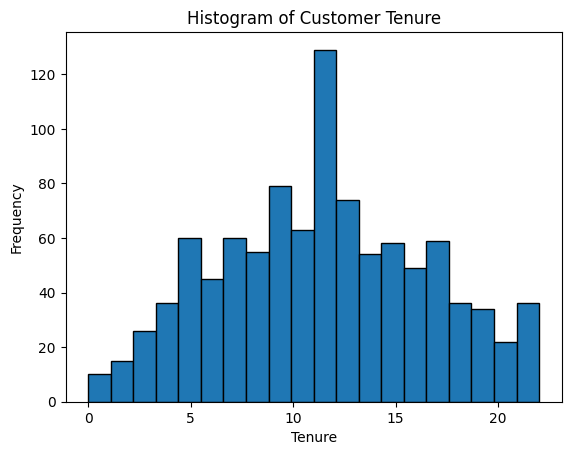

In [235]:
plotify(ncus['tenure'], T='Histogram of Customer Tenure', x='Tenure', b=20)

### Observations


- Null values in columns
    - last_name                               29
    - DOB                                     17
    - job_title                              106
    - job_industry_category                  165


- No duplicates.


- Between property_valuation and Rank, I found 5 columns are not labelled and hence do not provide any meaningful information.
    
    
- Do not understand what Rank provides towards new customer data.


- The new customer data does not intersect with existing customer demographic data in terms of customer names.


- Ages are reasonable and similar age distribution like existing customer data.


- All new customers have deceased_indicator is No


- New customer data follows existing customer in terms of industry, wealth and job titles.